# Question 1 : Classification using Naive Bayes

Can glucose and blood pressure data classify whether a patient has diabetes or not ? If yes, which classification algorithm should you use ?

The dataset **diabetes_classification.csv** has 3 columns and 995 entries with the above data.


1. Load the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('diabetes.csv')
df.head()

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1


2. The dataset has two feature columns and one target column. Plot a bar graph or histogram showing the distribution of values in the feature columns (count of each value).

<BarContainer object of 995 artists>

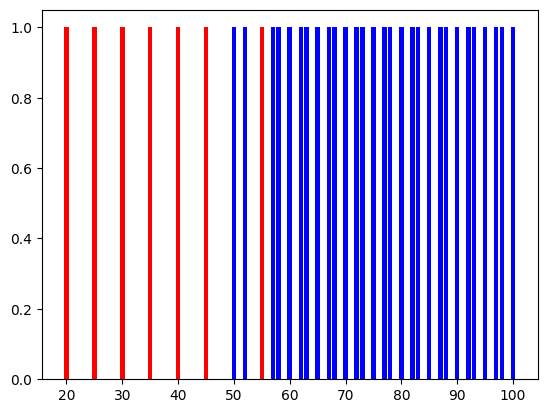

In [2]:
plt.bar(df['glucose'], height = 1,  color = 'red')
plt.bar(df['bloodpressure'], height = 1, color = 'blue')

 The feature column **glucose** has a somewhat Gaussian distribution of data. So we will try out Gaussian Naive Bayes classification for the data using Scikit-Learn.

3. Split the dataset.
4. Fit a Gaussian NB model on the data. Make predictions and find the accuracy score.

Optional :
5. Compare the model with other classification algorithms like Logistic Regression, KNN, decision tree etc.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df[['glucose', 'bloodpressure']], df['diabetes'], random_state = 1)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9477911646586346


# Question 2 : Regression using SVM and Tree Algorithms

In this question, we will be using the **insurance.csv** file which contain information on insurance charges based on the following informations: age,sex,bmi,region,number of children and whether the person is a smoker or not. You need to predict the charges based on the information given.

### 1. Load the data.

In [4]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 2. Separate the numerical and categorical columns.



In [5]:
df_num = df[['age', 'bmi', 'children', 'charges']]
df_cat = df[['sex', 'smoker', 'region']]
df_cat.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


### 3. Label Encode the categorical columns.


In [6]:
from sklearn import preprocessing

le_sex = preprocessing.LabelEncoder()
le_smoker = preprocessing.LabelEncoder()
le_region = preprocessing.LabelEncoder()
le_sex.fit(df_cat['sex'].unique())
le_smoker.fit(df_cat['smoker'].unique())
le_region.fit(df_cat['region'].unique())
df_cat = df_cat.assign(sex_encoded = le_sex.transform(df_cat.sex))
df_cat = df_cat.assign(smoker_encoded = le_smoker.transform(df_cat.smoker))
df_cat = df_cat.assign(region_encoded = le_region.transform(df_cat.region))
df_cat.head()

,sex,smoker,region,sex_encoded,smoker_encoded,region_encoded
0,female,yes,southwest,0,1,3
1,male,no,southeast,1,0,2
2,male,no,southeast,1,0,2
3,male,no,northwest,1,0,1
4,male,no,northwest,1,0,1


### 4. Scale the numerical columns. (Scale the charges separately so that you can calculate errors afterwards.)

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_num[['age', 'bmi', 'children']] = scaler.fit_transform(df_num[['age', 'bmi', 'children']])
df_num['charges'] = scaler.fit_transform(df_num[['charges']])
df_num.head()

C:\Users\Devansh Bansal\AppData\Local\Temp\ipykernel_2672\1131736153.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[['age', 'bmi', 'children']] = scaler.fit_transform(df_num[['age', 'bmi', 'children']])
C:\Users\Devansh Bansal\AppData\Local\Temp\ipykernel_2672\1131736153.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['charges'] = scaler.fit_transform(df_num[['charges']])


,age,bmi,children,charges
0,0.021739,0.321227,0.0,0.251611
1,0.000000,0.479150,0.2,0.009636
2,0.217391,0.458434,0.6,0.053115
3,0.326087,0.181464,0.0,0.333010
4,0.304348,0.347592,0.0,0.043816


### 5. Split the data.

In [8]:
from sklearn.model_selection import train_test_split

df_final = pd.concat([df_num, df_cat], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(df_final[['age', 'bmi', 'children','sex_encoded', 'smoker_encoded', 'region_encoded']], df_final['charges'], random_state = 1)

### 6. Support Vector Regressor

Here , you will use the SVR model from sklearn.svm and fit it on the training data. Then predict on the test data and calaculate MAE, MSE. But...

The SVR class contains many hyperparameters, example : kernel can have the following values : linear, rbf, poly, sigmoid.

Use **RandomizedSearchCV** from sklearn.model_selection , create a dictionary with keys 'kernel' and 'gamma' . As values of the keys, create a list of some possible values. Run a 3-fold cross validation test (cv=3) and find the best parameters. Then initiate the SVR model with those parameters.

In [9]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

svr = SVR()
dict = {'kernel' : ['linear', 'rbf', 'poly', 'sigmoid'], 'gamma' : [1, 0.1, 0.01, 0.001]}
search = RandomizedSearchCV(svr, dict, cv = 3, random_state=0)
search.fit(X_train, y_train)

best_params = search.best_params_
best_model = SVR(kernel = best_params['kernel'], gamma = best_params['gamma'])
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("MAE:", mae)
print("MSE:", mse)
print("r2:", r2)

Best Hyperparameters: {'kernel': 'poly', 'gamma': 1}
MAE: 0.08284606670582445
MSE: 0.008572510884140532
r2: 0.7498744621985871


### 7. AdaBoost Regressor

We would do similar for AdaBoostRegressor from sklearn.ensemble . Here, the hyperparameters are n_estimators and loss.

Instead of RandomizedSearchCV, let's try GridSearchCV . Find the best parameters and then find errors on test data using the model with best parameters.

In [10]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

abr = AdaBoostRegressor()
dict = {'loss' : ['linear', 'square', 'exponential'], 'n_estimators' : [10, 50, 100,500]}
search = GridSearchCV(abr, dict, cv = 3)
search.fit(X_train, y_train)

best_params = search.best_params_
best_model = AdaBoostRegressor(n_estimators = best_params['n_estimators'], loss = best_params['loss'])
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("MAE:", mae)
print("MSE:", mse)
print("r2:", r2)

Best Hyperparameters: {'loss': 'linear', 'n_estimators': 100}
MAE: 0.0631099154041216
MSE: 0.006713727649279002
r2: 0.8041093488682706


8. Now carry the same procedure for Random Forest Regressor and for Gradient Boosting Regression.


In [11]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
dict = {'n_estimators' : [10, 50, 100,500]}
search = GridSearchCV(rfr, dict, cv = 3)
search.fit(X_train, y_train)

best_params = search.best_params_
best_model = RandomForestRegressor(n_estimators = best_params['n_estimators'])
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("MAE:", mae)
print("MSE:", mse)
print("r2:", r2)

Best Hyperparameters: {'n_estimators': 500}
MAE: 0.04286140538075424
MSE: 0.005736957447535279
r2: 0.8326091869345641


In [12]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
dict = {'n_estimators' : [10, 50, 100,500], 'learning_rate' : [0.1, 0.01, 0.001]}
search = GridSearchCV(gbr, dict, cv = 3)
search.fit(X_train, y_train)

best_params = search.best_params_
best_model = GradientBoostingRegressor(n_estimators = best_params['n_estimators'], learning_rate = best_params['learning_rate'])
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("MAE:", mae)
print("MSE:", mse)
print("r2:", r2)

Best Hyperparameters: {'learning_rate': 0.01, 'n_estimators': 500}
MAE: 0.03878715538935702
MSE: 0.004833856566927197
r2: 0.8589595289176729


9. Finally, use <a href="https://xgboost.readthedocs.io/en/stable/get_started.html"> XGBoost Regressor </a> and compare all the models. Comment which model had the least error (MAE and MSE).
You will be required to run  <code> !pip install xgboost </code> to import xgboost models.

In [13]:
%pip install xgboost
from xgboost import XGBRegressor

xgb = XGBRegressor()
dict = {'booster' : ['gbtree','gblinear','dart'], 'eta' : [0.1, 0.01, 0.001]}
search = GridSearchCV(xgb, dict, cv = 3)
search.fit(X_train, y_train)

best_params = search.best_params_
best_model = XGBRegressor(booster = best_params['booster'], eta = best_params['eta'])
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("MAE:", mae)
print("MSE:", mse)
print("r2:", r2)

Note: you may need to restart the kernel to use updated packages.
Best Hyperparameters: {'booster': 'dart', 'eta': 0.1}
MAE: 0.04180025636707856
MSE: 0.00571908305906886
r2: 0.8331307192007179


### Gradient Boosting Regressor had the least MAE and MSE.
#  

# Question 3 : Classification using SVM and Tree Algorithms

In this question, we will be using the **bookmyshow_ads.csv** file which contain information on whether an url is spam or not based on 32 features. You need to classify the url as spam or not spam based on the information given.

### 1. Load the data.

In [21]:
df = pd.read_csv('bookmyshow_ads.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   index                        11055 non-null  object
 1   having_IPhaving_IP_Address   11055 non-null  int64 
 2   URLURL_Length                11055 non-null  int64 
 3   Shortining_Service           11055 non-null  int64 
 4   having_At_Symbol             11055 non-null  int64 
 5   double_slash_redirecting     11055 non-null  int64 
 6   Prefix_Suffix                11055 non-null  int64 
 7   having_Sub_Domain            11055 non-null  int64 
 8   SSLfinal_State               11055 non-null  int64 
 9   Domain_registeration_length  11055 non-null  int64 
 10  Favicon                      11055 non-null  int64 
 11  port                         11055 non-null  int64 
 12  HTTPS_token                  11055 non-null  int64 
 13  Request_URL                  11

### 2. Split the data.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Result','index'], axis = 1), df['Result'], random_state = 1)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8291 entries, 4640 to 235
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IPhaving_IP_Address   8291 non-null   int64
 1   URLURL_Length                8291 non-null   int64
 2   Shortining_Service           8291 non-null   int64
 3   having_At_Symbol             8291 non-null   int64
 4   double_slash_redirecting     8291 non-null   int64
 5   Prefix_Suffix                8291 non-null   int64
 6   having_Sub_Domain            8291 non-null   int64
 7   SSLfinal_State               8291 non-null   int64
 8   Domain_registeration_length  8291 non-null   int64
 9   Favicon                      8291 non-null   int64
 10  port                         8291 non-null   int64
 11  HTTPS_token                  8291 non-null   int64
 12  Request_URL                  8291 non-null   int64
 13  URL_of_Anchor                8291 non-null   i

### 3. Model Comparison

Similar to the previous question, use the following classifier models from sklearn and compare them:
1. Decision Tree
2. Random Forest
3. Adaboost
4. Gradient Boost
5. XGBoost

For each model, you may also try to find the best hyperparameters using GridSearch Cross Validation or RandomizedSearch Cross Validation.

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dtc = DecisionTreeClassifier()
dict = {'max_features' : ['sqrt', 'log2', None], 'criterion' : ['gini', 'entropy', 'log_loss']}
search = GridSearchCV(dtc, dict, cv = 3)
search.fit(X_train, y_train)

best_params = search.best_params_
best_model = DecisionTreeClassifier(max_features = best_params['max_features'], criterion = best_params['criterion'])
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)

Best Hyperparameters: {'criterion': 'entropy', 'max_features': None}
Accuracy: 0.9663531114327062


In [29]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
dict = {'n_estimators' : [10, 50, 100,500]}
search = GridSearchCV(rfr, dict, cv = 3)
search.fit(X_train, y_train)

best_params = search.best_params_
best_model = RandomForestClassifier(n_estimators = best_params['n_estimators'])
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)

Best Hyperparameters: {'n_estimators': 500}
Accuracy: 0.9721418234442837


In [30]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()
dict = {'n_estimators' : [10, 50, 100,500]}
search = GridSearchCV(abc, dict, cv = 3)
search.fit(X_train, y_train)

best_params = search.best_params_
best_model = AdaBoostClassifier(n_estimators = best_params['n_estimators'])
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)

Best Hyperparameters: {'n_estimators': 50}
Accuracy: 0.9345151953690304


In [31]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
dict = {'n_estimators' : [10, 50, 100,500], 'learning_rate' : [0.1, 0.01, 0.001]}
search = GridSearchCV(gbc, dict, cv = 3)
search.fit(X_train, y_train)

best_params = search.best_params_
best_model = GradientBoostingClassifier(n_estimators = best_params['n_estimators'], learning_rate = best_params['learning_rate'])
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)

Best Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 500}
Accuracy: 0.959479015918958


In [32]:
from xgboost import XGBClassifier

xgc = XGBClassifier()
dict = {'booster' : ['gbtree','gblinear','dart'], 'eta' : [0.1, 0.01, 0.001]}
search = GridSearchCV(xgc, dict, cv = 3)
search.fit(X_train, y_train)

best_params = search.best_params_
best_model = XGBClassifier(booster = best_params['booster'], eta = best_params['eta'])
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)

Best Hyperparameters: {'booster': 'gbtree', 'eta': 0.1}
Accuracy: 0.9645441389290883


### RandomForestClassifier is the most accurate.

# Question 4 : Clustering

Customer Segmentation is the subdivision of a market into discrete customer groups that share similar characteristics. Customer Segmentation can be a powerful means to identify unsatisfied customer needs.

The csv file **segmentation data.csv** contains basic data about some customers like Customer ID, age, gender, annual income and spending score. You want to classify the customers into different groups so that marketing strategy could be planned in the future accordingly. How many different groups should be made ? What should be the approach ?

This is an Unsupervised Learning question since it doesn't provide you with labels - the groups. 

### 1. Import the necessary modules

### 2. Read the csv file "segmentation data.csv" present in the Github repository as a Pandas DataFrame.

In [42]:
df = pd.read_csv('segmentation data.csv')
print(df.head())

          ID  Sex  Marital status  Age  Education  Income  Occupation  \
0  100000001    0               0   67          2  124670           1   
1  100000002    1               1   22          1  150773           1   
2  100000003    0               0   49          1   89210           0   
3  100000004    0               0   45          1  171565           1   
4  100000005    0               0   53          1  149031           1   

   Settlement size  
0                2  
1                2  
2                0  
3                1  
4                1  


### 3. Do the necessary preprocessing of the data.

> Drop unwanted columns.

> Check for null values.

> Scale the numerical columns.

> Additionally, you may also make the Age column have categorical values. How ? Apply some function that makes age groups turns all ages in some group to a particular number !

Note : Don't do everything in a single code block ! Do it step-by-step and show output for each step.

In [43]:
df.drop(['ID'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB


In [46]:
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
data = data.assign(Age_Group = df['Age'])
data.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Age_Group
0,0.0,0.0,0.844828,0.666667,0.324781,0.5,1.0,67
1,1.0,1.0,0.068966,0.333333,0.420210,0.5,1.0,22
2,0.0,0.0,0.534483,0.333333,0.195144,0.0,0.0,49
3,0.0,0.0,0.465517,0.333333,0.496223,0.5,0.5,45
4,0.0,0.0,0.603448,0.333333,0.413842,0.5,0.5,53


In [47]:
for age in data['Age_Group']:
    if age < 18:
        data['Age_Group'].replace(age, 'Young', inplace = True)
    elif age < 35:
        data['Age_Group'].replace(age, 'Middle', inplace = True)
    elif age < 60:
        data['Age_Group'].replace(age, 'Senior', inplace = True)
    else:
        data['Age_Group'].replace(age, 'Old', inplace = True)
data.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Age_Group
0,0.0,0.0,0.844828,0.666667,0.324781,0.5,1.0,Old
1,1.0,1.0,0.068966,0.333333,0.420210,0.5,1.0,Middle
2,0.0,0.0,0.534483,0.333333,0.195144,0.0,0.0,Senior
3,0.0,0.0,0.465517,0.333333,0.496223,0.5,0.5,Senior
4,0.0,0.0,0.603448,0.333333,0.413842,0.5,0.5,Senior


### 4. KMeans Model Training - Scikit-Learn

At first, let's try to implement KMeans Clustering using sklearn.clusters.KMeans .

How to decide for the value 'K' ?

Read the following blog. It provides different ways of evaluating clustering algorithms.

https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters

We will be looking on two methods : Elbow Method, Silhouette Analysis.

**Make a list of values for K , ranging from 2 to 10. For each K, fit a model, calculate the inertia and silhouette scores. Plot them. Decide which value of K is optimal !**

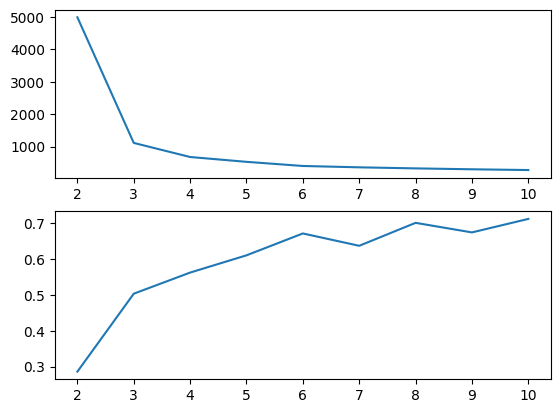

In [54]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

K_list = [2, 3, 4, 5, 6, 7, 8, 9, 10]
inertia = []
silhouette = []
for K in K_list:
    kmeans = KMeans(n_clusters = K, n_init = 10, random_state = 1)
    kmeans.fit(data.drop(['Age_Group'], axis = 1))
    data['Cluster'] = kmeans.labels_
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(data.drop(['Age_Group'], axis = 1), data['Cluster']))
fig, axs = plt.subplots(2)
axs[0].plot(K_list, inertia)
axs[1].plot(K_list, silhouette)


### 5. KMeans Model Prediction

Once you decided the optimal K, once again fit a model with that K value and store the silhouette score and the labels for the entire data.

It is observed that the optimal value of k is 4. So, let's store the values of inertia and labels for k=4.

In [59]:
kmeans = KMeans(n_clusters = 3, n_init = 10, random_state = 1)
kmeans.fit(data.drop(['Age_Group'], axis = 1))
data['Cluster'] = kmeans.labels_
ss = silhouette_score(data.drop(['Age_Group'], axis = 1), data['Cluster'])

### 6. KMeans Model Training - Scratch

Now, code the KMeans Model from scratch. Train it on the data, and try to find out when you have the labels with maximum accuracy when compared to the labels of the SkLearn model.

### 7. DBSCAN model training - Scikit-Learn

Using sklear.clusters.DBSCAN, you have to fit a model on the data.

But, here we would like to deal with two hyperparameters : epsilon and minimum number of samples.

Make two lists. One with some probable values for epsilon, other with probable values for min_samples.

Example : eps= [0.1,0.2,0.5,1,2] , min_samples=[3,4,5,6]

Run a nested loop. for each value of eps and min_samples, fit a dbscan model on the data and calculate the silhouette score. Find the parameters for which the silhouette score is maximum.

In [60]:
from sklearn.cluster import DBSCAN
eps = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
min_samples = [2, 3, 4, 5, 6, 7, 8, 9, 10]

max = 0
best_eps = 0
best_min_samples = 0
for e in eps:
    for s in min_samples:
        dbscan = DBSCAN(eps = e, min_samples = s)
        dbscan.fit(data.drop(['Age_Group'], axis = 1))
        data['Cluster'] = dbscan.labels_
        ss = silhouette_score(data.drop(['Age_Group'], axis = 1), data['Cluster'])
        if ss > max:
            max = ss
            best_eps = e
            best_min_samples = s
print("Best eps:", best_eps)
print("Best min_samples:", best_min_samples)
print("Best silhouette score:", max)

Best eps: 0.3
Best min_samples: 2
Best silhouette score: 0.8890579142106397


### 8. DBSCAN model training - Scratch

Code the DBScan model. For the same epsilon and min_samples values, fit the model on the data. You should receive the same silhouette score.